In [21]:
# let's create deck

import random
import matplotlib.pyplot as plt

def create_deck():
    deck = [2,3,4,5,6,7,8,9,10,10,10,10,11] * 4 # 4 copies of each suit of card
    random.shuffle(deck)
    return deck

def deal_card(deck):
    return deck.pop()

# evaluate_hand function if hand contains aces

## need to fix this function
def evaluate_hand(hand):
    num_aces = sum(1 for card in hand if card == 11)
    hand_value = sum(hand)
    while hand_value > 21 and num_aces > 0:
        hand_value -= 10
        num_aces -= 1
    return hand_value


def store_scores_and_visualize(player_scores, dealer_scores,num_iterations,player_cutoff):
    plt.hist(player_scores, bins=range(4, 31), color='green', alpha=0.7, label='Player Scores', edgecolor='black')
    plt.hist(dealer_scores, bins=range(4, 31), color='red', alpha=0.7, label='Dealer Scores', edgecolor='black')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.title(f"{num_iterations} Simulated Blackjack Games Hitting On {player_cutoff}.")
    plt.legend()
    plt.grid(True)
    plt.show()

def simulate_blackjack(num_iterations, player_cutoff):
    
    # start time
    import time 
    start_time = time.time()
    
    player_wins = 0
    dealer_wins = 0
    ties = 0 
    player_scores = []
    dealer_scores = []    
    
    for i in range(num_iterations):
        
        deck = create_deck()
        player_hand = [deal_card(deck), deal_card(deck)]
        dealer_hand = [deal_card(deck), deal_card(deck)]
        
        while True:
            
            # evaluate player hands
            player_score = evaluate_hand(player_hand)
            dealer_score = evaluate_hand(dealer_hand)

            # check if player wins 
            if player_score == 21 or dealer_score > 21:
                player_wins += 1
                player_scores.append(player_score)
                dealer_scores.append(dealer_score)
                break
            # check if dealer wins
            elif dealer_score == 21 or player_score > 21:
                dealer_wins += 1
                player_scores.append(player_score)
                dealer_scores.append(dealer_score)
                break

            # player_cutoff and dealer_cutoff represent what values you hit at
            dealer_cutoff = 17 
            
            # player's turn
            if player_score <= player_cutoff:
                player_hand.append(deal_card(deck))
            
            # dealer's turn
            else:
                while dealer_score < dealer_cutoff:
                    dealer_hand.append(deal_card(deck))
                    dealer_score = evaluate_hand(dealer_hand)
                if dealer_score > 21:
                    player_wins += 1
                    player_scores.append(player_score)
                    dealer_scores.append(dealer_score)
                    break
                elif dealer_score > player_score:
                    dealer_wins += 1
                    player_scores.append(player_score)
                    dealer_scores.append(dealer_score)
                    break
                elif dealer_score < player_score:
                    player_wins += 1
                    player_scores.append(player_score)
                    dealer_scores.append(dealer_score)
                    break
                else:
                    ties += 1
                    player_scores.append(player_score)
                    dealer_scores.append(dealer_score)
                    break
                    
            # Calculate win rates
    total_games = player_wins + dealer_wins + ties
    player_win_rate = player_wins / total_games
    dealer_win_rate = dealer_wins / total_games
    tie_rate = ties / total_games
    
    # visualize the ending scores and cacualte time
    store_scores_and_visualize(player_scores, dealer_scores,num_iterations,player_cutoff)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    print(f"{num_iterations} games of black jack hitting on {player_cutoff}.")
    print(f"Player Win Rate: {player_win_rate * 100:.2f}%")
    print(f"Dealer Win Rate: {dealer_win_rate * 100:.2f}%")
    print(f"Tie Rate: {tie_rate * 100:.2f}%")
    print(f"Compute time -- {elapsed_time} seconds.%")

    return player_win_rate, dealer_win_rate, tie_rate



##### calculate winning rates based on cutoff? how else do i optimize play?

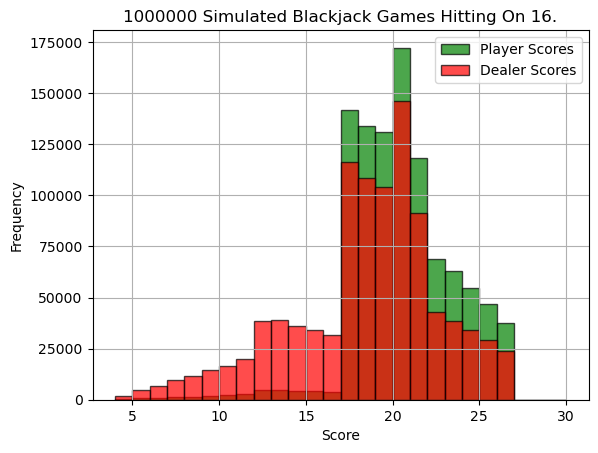

1000000 games of black jack hitting on 16.
Player Win Rate: 41.95%
Dealer Win Rate: 49.28%
Tie Rate: 8.77%
Compute time -- 95.34862732887268 seconds.%


(0.419542, 0.492761, 0.087697)

In [22]:
simulate_blackjack(1000000, 16)

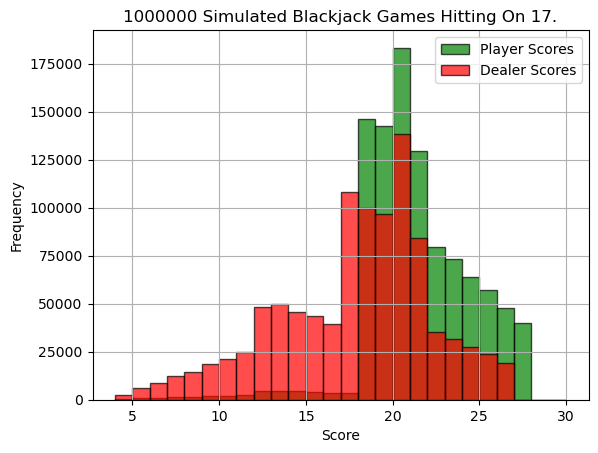

1000000 games of black jack hitting on 17.
Player Win Rate: 41.00%
Dealer Win Rate: 51.78%
Tie Rate: 7.22%
Compute time -- 95.05200266838074 seconds.%


(0.410015, 0.517795, 0.07219)

In [23]:
simulate_blackjack(1000000, 17)